In [88]:
import torch 

In [89]:
import numpy as np

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# creating some data to train Linear Regression 
x = torch.tensor(np.arange(10), dtype = torch.float32)
y = x*5 + 10 + torch.randint(low = -5, high = 5, size = (10,), dtype = torch.float32)
print(x)
print(y)

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
tensor([14., 16., 15., 27., 25., 39., 39., 49., 47., 59.])


<AxesSubplot:>

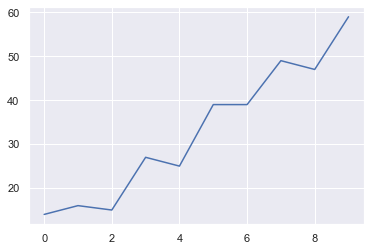

In [92]:
sns.set()
sns.lineplot(x = x, y = y)

In [93]:
# initializing weights
# we have only one feature, so we need to find two coefficients: slope and intercept 
# let's initialize them as zeros 

w = torch.zeros(2, dtype = torch.float16, )
print(w)

tensor([0., 0.], dtype=torch.float16)


In [94]:
# functions
def predict(w, x):
    y_pred = w[0]*x + w[1]
    return y_pred 

def mseerror(y, y_pred):
    loss_val = ((y_pred - y)**2).mean()
    return loss_val 

# derivative from mse with respect to slope: 2x*(y - y_pred)
def beta1gradient(x, y, y_pred):
    direction = np.dot(2*x, y_pred - y).mean()
    return direction 
# derivative from mse with respect to intercept: 2x*(y - y_pred)
def beta0gradient(x, y, y_pred):
    direction = np.dot(2, y_pred - y).mean()
    return direction

In [95]:
# let's check our predictions before training 
y_pred = predict(w, x)
error = mseerror(y, y_pred)
print(error)

tensor(1316.4000)


<AxesSubplot:>

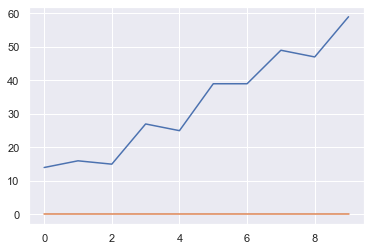

In [96]:
sns.set()
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)

In [97]:
#training 
#first let's train our model with a stopping criteria as numbers of steps 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    error = mseerror(y, y_pred)
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1316.4000244140625, weights = tensor([2.2871, 0.0396], dtype=torch.float16)
step №1: loss = 591.8363037109375, weights = tensor([3.7891, 0.0668], dtype=torch.float16)
step №2: loss = 279.05633544921875, weights = tensor([4.7773, 0.0859], dtype=torch.float16)
step №3: loss = 143.7643280029297, weights = tensor([5.4258, 0.0995], dtype=torch.float16)
step №4: loss = 85.40746307373047, weights = tensor([5.8516, 0.1097], dtype=torch.float16)
step №5: loss = 60.19525146484375, weights = tensor([6.1328, 0.1176], dtype=torch.float16)
step №6: loss = 49.23950958251953, weights = tensor([6.3164, 0.1240], dtype=torch.float16)
step №7: loss = 44.53091049194336, weights = tensor([6.4375, 0.1293], dtype=torch.float16)
step №8: loss = 42.479530334472656, weights = tensor([6.5156, 0.1339], dtype=torch.float16)
step №9: loss = 41.597198486328125, weights = tensor([6.5664, 0.1382], dtype=torch.float16)
step №10: loss = 41.2054328918457, weights = tensor([6.6016, 0.1422], dtype=torch.floa

step №332: loss = 35.25914764404297, weights = tensor([6.5039, 1.1846], dtype=torch.float16)
step №333: loss = 35.24421310424805, weights = tensor([6.5039, 1.1875], dtype=torch.float16)
step №334: loss = 35.22929000854492, weights = tensor([6.5039, 1.1904], dtype=torch.float16)
step №335: loss = 35.21438980102539, weights = tensor([6.5039, 1.1934], dtype=torch.float16)
step №336: loss = 35.199501037597656, weights = tensor([6.5039, 1.1963], dtype=torch.float16)
step №337: loss = 35.184635162353516, weights = tensor([6.5039, 1.1992], dtype=torch.float16)
step №338: loss = 35.16978073120117, weights = tensor([6.5039, 1.2021], dtype=torch.float16)
step №339: loss = 35.15494918823242, weights = tensor([6.5000, 1.2051], dtype=torch.float16)
step №340: loss = 35.139122009277344, weights = tensor([6.5000, 1.2080], dtype=torch.float16)
step №341: loss = 35.124229431152344, weights = tensor([6.5000, 1.2109], dtype=torch.float16)
step №342: loss = 35.109336853027344, weights = tensor([6.5000, 1.

step №649: loss = 30.914093017578125, weights = tensor([6.3633, 2.0762], dtype=torch.float16)
step №650: loss = 30.9051456451416, weights = tensor([6.3633, 2.0781], dtype=torch.float16)
step №651: loss = 30.896209716796875, weights = tensor([6.3633, 2.0801], dtype=torch.float16)
step №652: loss = 30.887277603149414, weights = tensor([6.3633, 2.0820], dtype=torch.float16)
step №653: loss = 30.87835693359375, weights = tensor([6.3633, 2.0840], dtype=torch.float16)
step №654: loss = 30.86944007873535, weights = tensor([6.3633, 2.0859], dtype=torch.float16)
step №655: loss = 30.86053466796875, weights = tensor([6.3633, 2.0879], dtype=torch.float16)
step №656: loss = 30.851633071899414, weights = tensor([6.3633, 2.0898], dtype=torch.float16)
step №657: loss = 30.842742919921875, weights = tensor([6.3633, 2.0918], dtype=torch.float16)
step №658: loss = 30.8338565826416, weights = tensor([6.3594, 2.0938], dtype=torch.float16)
step №659: loss = 30.824047088623047, weights = tensor([6.3594, 2.0

Text(0.5, 1.0, 'Manually calculated derivative loss = 27.898834228515625')

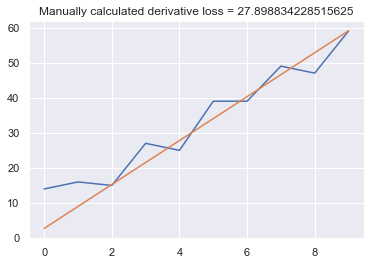

In [98]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative loss = {error}')

In [99]:
#training 
#now stopping criteria is difference between errors  
learning_rait = 0.0006 
w = torch.zeros(2, dtype = torch.float16)
y_pred = predict(w, x)
previous_error = mseerror(y, y_pred)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
error = mseerror(y, y_pred)
y_pred = predict(w, x)
beta1 = beta1gradient(x, y, y_pred)
beta0 = beta0gradient(x, y, y_pred)
w -= learning_rait*torch.tensor([beta1,beta0]) 
previous_error = error
error = mseerror(y, y_pred)
while previous_error - error > 0.0000000005:
    y_pred = predict(w, x)
    beta1 = beta1gradient(x, y, y_pred)
    beta0 = beta0gradient(x, y, y_pred)
    w -= learning_rait*torch.tensor([beta1,beta0]) 
    previous_error = error 
    error = mseerror(y, y_pred)
    print(f'did one more step, loss reduced by {previous_error - error}')

did one more step, loss reduced by 312.77996826171875
did one more step, loss reduced by 135.29200744628906
did one more step, loss reduced by 58.35686492919922
did one more step, loss reduced by 25.21221160888672
did one more step, loss reduced by 10.955741882324219
did one more step, loss reduced by 4.708599090576172
did one more step, loss reduced by 2.051380157470703
did one more step, loss reduced by 0.8823318481445312
did one more step, loss reduced by 0.3917655944824219
did one more step, loss reduced by 0.18954849243164062
did one more step, loss reduced by 0.09249114990234375
did one more step, loss reduced by 0.0444488525390625
did one more step, loss reduced by 0.0313262939453125
did one more step, loss reduced by 0.027313232421875
did one more step, loss reduced by 0.0223846435546875
did one more step, loss reduced by 0.020538330078125
did one more step, loss reduced by 0.0195770263671875
did one more step, loss reduced by 0.01955413818359375
did one more step, loss reduced

did one more step, loss reduced by 0.014080047607421875
did one more step, loss reduced by 0.01506805419921875
did one more step, loss reduced by 0.0141448974609375
did one more step, loss reduced by 0.014129638671875
did one more step, loss reduced by 0.0141143798828125
did one more step, loss reduced by 0.01409912109375
did one more step, loss reduced by 0.014072418212890625
did one more step, loss reduced by 0.014068603515625
did one more step, loss reduced by 0.014041900634765625
did one more step, loss reduced by 0.014987945556640625
did one more step, loss reduced by 0.0141143798828125
did one more step, loss reduced by 0.014095306396484375
did one more step, loss reduced by 0.014072418212890625
did one more step, loss reduced by 0.014068603515625
did one more step, loss reduced by 0.0140380859375
did one more step, loss reduced by 0.014034271240234375
did one more step, loss reduced by 0.014007568359375
did one more step, loss reduced by 0.013996124267578125
did one more step, l

did one more step, loss reduced by 0.008190155029296875
did one more step, loss reduced by 0.0081787109375
did one more step, loss reduced by 0.009138107299804688
did one more step, loss reduced by 0.00823211669921875
did one more step, loss reduced by 0.00823211669921875
did one more step, loss reduced by 0.00821685791015625
did one more step, loss reduced by 0.00821685791015625
did one more step, loss reduced by 0.00820159912109375
did one more step, loss reduced by 0.00820159912109375
did one more step, loss reduced by 0.00818634033203125
did one more step, loss reduced by 0.00818634033203125
did one more step, loss reduced by 0.00817108154296875
did one more step, loss reduced by 0.00817108154296875
did one more step, loss reduced by 0.00815582275390625
did one more step, loss reduced by 0.009067535400390625
did one more step, loss reduced by 0.008213043212890625
did one more step, loss reduced by 0.008205413818359375
did one more step, loss reduced by 0.0081939697265625
did one mo

did one more step, loss reduced by 0.00710296630859375
did one more step, loss reduced by 0.00708770751953125
did one more step, loss reduced by 0.00708770751953125
did one more step, loss reduced by 0.00707244873046875
did one more step, loss reduced by 0.00707244873046875
did one more step, loss reduced by 0.00705718994140625
did one more step, loss reduced by 0.00705718994140625
did one more step, loss reduced by 0.00704193115234375
did one more step, loss reduced by 0.00704193115234375
did one more step, loss reduced by 0.007961273193359375
did one more step, loss reduced by 0.0070953369140625
did one more step, loss reduced by 0.007080078125
did one more step, loss reduced by 0.007080078125
did one more step, loss reduced by 0.0070648193359375
did one more step, loss reduced by 0.0070648193359375
did one more step, loss reduced by 0.007049560546875
did one more step, loss reduced by 0.007049560546875
did one more step, loss reduced by 0.0070343017578125
did one more step, loss red

Text(0.5, 1.0, 'Manually calculated derivative. Slope = 6.0078125, intercept = 4.33984375, loss = 21.95675277709961')

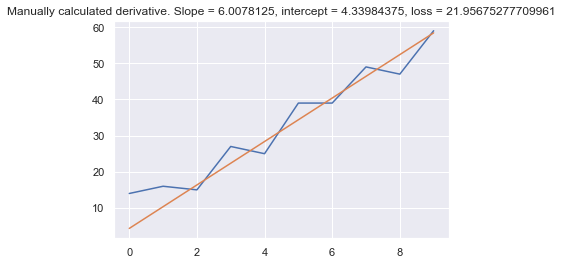

In [100]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred)
plt.title(f'Manually calculated derivative. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [101]:
#now let's use PyTorch gradient calculation. We don't need our gradient function. 
learning_rait = 0.0006 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float16, requires_grad = True) #it should be mentioned that in the future 
                                                            #you will need a derivative with respect to these values
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = mseerror(y, y_pred)
    error.backward()
    with torch.no_grad():
        w -= learning_rait*w.grad
    w.grad.zero_()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1316.4000244140625, weights = tensor([0.2286, 0.0396], dtype=torch.float16, requires_grad=True)
step №1: loss = 1228.2037353515625, weights = tensor([0.4492, 0.0779], dtype=torch.float16, requires_grad=True)
step №2: loss = 1146.08984375, weights = tensor([0.6621, 0.1150], dtype=torch.float16, requires_grad=True)
step №3: loss = 1069.607177734375, weights = tensor([0.8677, 0.1509], dtype=torch.float16, requires_grad=True)
step №4: loss = 998.3416137695312, weights = tensor([1.0664, 0.1855], dtype=torch.float16, requires_grad=True)
step №5: loss = 931.8660278320312, weights = tensor([1.2578, 0.2191], dtype=torch.float16, requires_grad=True)
step №6: loss = 870.0784301757812, weights = tensor([1.4424, 0.2517], dtype=torch.float16, requires_grad=True)
step №7: loss = 812.5750732421875, weights = tensor([1.6201, 0.2832], dtype=torch.float16, requires_grad=True)
step №8: loss = 759.1357421875, weights = tensor([1.7920, 0.3137], dtype=torch.float16, requires_grad=True)
step №

step №329: loss = 31.282373428344727, weights = tensor([6.4102, 2.0059], dtype=torch.float16, requires_grad=True)
step №330: loss = 31.273975372314453, weights = tensor([6.4102, 2.0078], dtype=torch.float16, requires_grad=True)
step №331: loss = 31.265588760375977, weights = tensor([6.4102, 2.0098], dtype=torch.float16, requires_grad=True)
step №332: loss = 31.257205963134766, weights = tensor([6.4102, 2.0117], dtype=torch.float16, requires_grad=True)
step №333: loss = 31.24883460998535, weights = tensor([6.4102, 2.0137], dtype=torch.float16, requires_grad=True)
step №334: loss = 31.240467071533203, weights = tensor([6.4102, 2.0156], dtype=torch.float16, requires_grad=True)
step №335: loss = 31.23211097717285, weights = tensor([6.4102, 2.0176], dtype=torch.float16, requires_grad=True)
step №336: loss = 31.223758697509766, weights = tensor([6.4102, 2.0195], dtype=torch.float16, requires_grad=True)
step №337: loss = 31.215417861938477, weights = tensor([6.4102, 2.0215], dtype=torch.float

step №660: loss = 28.44011878967285, weights = tensor([6.3242, 2.6523], dtype=torch.float16, requires_grad=True)
step №661: loss = 28.4327392578125, weights = tensor([6.3242, 2.6543], dtype=torch.float16, requires_grad=True)
step №662: loss = 28.425363540649414, weights = tensor([6.3242, 2.6562], dtype=torch.float16, requires_grad=True)
step №663: loss = 28.417999267578125, weights = tensor([6.3242, 2.6582], dtype=torch.float16, requires_grad=True)
step №664: loss = 28.4106388092041, weights = tensor([6.3242, 2.6602], dtype=torch.float16, requires_grad=True)
step №665: loss = 28.403289794921875, weights = tensor([6.3242, 2.6621], dtype=torch.float16, requires_grad=True)
step №666: loss = 28.395944595336914, weights = tensor([6.3242, 2.6641], dtype=torch.float16, requires_grad=True)
step №667: loss = 28.38861083984375, weights = tensor([6.3203, 2.6660], dtype=torch.float16, requires_grad=True)
step №668: loss = 28.36892318725586, weights = tensor([6.3203, 2.6680], dtype=torch.float16, r

Text(0.5, 1.0, 'Derivative is calculated by Pytorch. Slope = 6.21875, intercept = 3.314453125, loss = 25.73291015625')

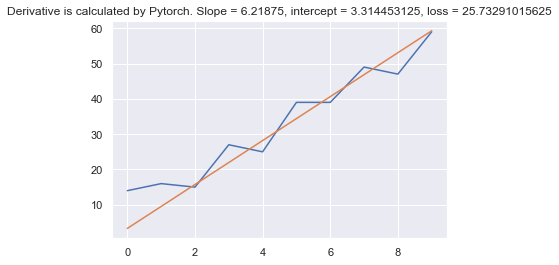

In [102]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Derivative is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

In [103]:
#let's also use mse error and optimizer which are provided by Pytorch library  
import torch.nn as nn 
number_of_steps = 1000 
w = torch.zeros(2, dtype = torch.float32, requires_grad = True)
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr = 0.0006)
for step in range(number_of_steps):
    y_pred = predict(w, x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

step №0: loss = 1316.4000244140625, weights = tensor([0.2287, 0.0396], requires_grad=True)
step №1: loss = 1228.1724853515625, weights = tensor([0.4494, 0.0779], requires_grad=True)
step №2: loss = 1146.02197265625, weights = tensor([0.6623, 0.1150], requires_grad=True)
step №3: loss = 1069.5299072265625, weights = tensor([0.8678, 0.1509], requires_grad=True)
step №4: loss = 998.3065185546875, weights = tensor([1.0660, 0.1856], requires_grad=True)
step №5: loss = 931.9890747070312, weights = tensor([1.2573, 0.2192], requires_grad=True)
step №6: loss = 870.2392578125, weights = tensor([1.4418, 0.2518], requires_grad=True)
step №7: loss = 812.7423706054688, weights = tensor([1.6199, 0.2833], requires_grad=True)
step №8: loss = 759.2057495117188, weights = tensor([1.7916, 0.3138], requires_grad=True)
step №9: loss = 709.3562622070312, weights = tensor([1.9574, 0.3434], requires_grad=True)
step №10: loss = 662.9398803710938, weights = tensor([2.1173, 0.3720], requires_grad=True)
step №11: 

step №320: loss = 31.416706085205078, weights = tensor([6.3894, 1.9696], requires_grad=True)
step №321: loss = 31.4039306640625, weights = tensor([6.3890, 1.9723], requires_grad=True)
step №322: loss = 31.391155242919922, weights = tensor([6.3885, 1.9750], requires_grad=True)
step №323: loss = 31.378408432006836, weights = tensor([6.3881, 1.9778], requires_grad=True)
step №324: loss = 31.365652084350586, weights = tensor([6.3877, 1.9805], requires_grad=True)
step №325: loss = 31.352914810180664, weights = tensor([6.3872, 1.9832], requires_grad=True)
step №326: loss = 31.34018325805664, weights = tensor([6.3868, 1.9860], requires_grad=True)
step №327: loss = 31.32745933532715, weights = tensor([6.3864, 1.9887], requires_grad=True)
step №328: loss = 31.314743041992188, weights = tensor([6.3859, 1.9914], requires_grad=True)
step №329: loss = 31.302032470703125, weights = tensor([6.3855, 1.9941], requires_grad=True)
step №330: loss = 31.289342880249023, weights = tensor([6.3851, 1.9969], r

step №654: loss = 27.59708595275879, weights = tensor([6.2518, 2.8329], requires_grad=True)
step №655: loss = 27.586898803710938, weights = tensor([6.2514, 2.8353], requires_grad=True)
step №656: loss = 27.576717376708984, weights = tensor([6.2510, 2.8378], requires_grad=True)
step №657: loss = 27.566553115844727, weights = tensor([6.2506, 2.8402], requires_grad=True)
step №658: loss = 27.556377410888672, weights = tensor([6.2502, 2.8427], requires_grad=True)
step №659: loss = 27.54622459411621, weights = tensor([6.2499, 2.8451], requires_grad=True)
step №660: loss = 27.53606605529785, weights = tensor([6.2495, 2.8475], requires_grad=True)
step №661: loss = 27.525924682617188, weights = tensor([6.2491, 2.8500], requires_grad=True)
step №662: loss = 27.51578140258789, weights = tensor([6.2487, 2.8524], requires_grad=True)
step №663: loss = 27.505651473999023, weights = tensor([6.2483, 2.8548], requires_grad=True)
step №664: loss = 27.495525360107422, weights = tensor([6.2479, 2.8573], r

In [111]:
sns.lineplot(x = x, y = y)
sns.lineplot(x = x, y = y_pred.detach().numpy())
plt.title(f'Everything is calculated by Pytorch. Slope = {w[0]}, intercept = {w[1]}, loss = {error}')

ValueError: If using all scalar values, you must pass an index

In [105]:
#it's time to replace prediction calculations too
x = np.arange(10)
y = x*5 + 10 + np.random.randint(-5, 5, 10)
x = torch.tensor([[item] for item in x], dtype = torch.float32)
y = torch.tensor([[item] for item in y], dtype = torch.float32)
model = nn.Linear(1, 1)
print(model.parameters())
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.0006)
for step in range(number_of_steps):
    y_pred = model(x)
    error = loss(y, y_pred)
    error.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'step №{step}: loss = {error}, weights = {w}')

<generator object Module.parameters at 0x7f8149bdfeb0>
step №0: loss = 1407.1378173828125, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №1: loss = 1311.8421630859375, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №2: loss = 1223.111083984375, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №3: loss = 1140.491943359375, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №4: loss = 1063.5634765625, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №5: loss = 991.9339599609375, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №6: loss = 925.2384033203125, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №7: loss = 863.1365356445312, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №8: loss = 805.31201171875, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №9: loss = 751.4703369140625, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №10: loss = 701.3368530273438, weights = t

step №332: loss = 19.76211929321289, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №333: loss = 19.750431060791016, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №334: loss = 19.738754272460938, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №335: loss = 19.72708511352539, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №336: loss = 19.71542739868164, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №337: loss = 19.703777313232422, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №338: loss = 19.69213104248047, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №339: loss = 19.680498123168945, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №340: loss = 19.668869018554688, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №341: loss = 19.65724754333496, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №342: loss = 19.64563751220703, weights = tensor([6.1250, 3.6277], req

step №675: loss = 16.18523597717285, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №676: loss = 16.175975799560547, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №677: loss = 16.166719436645508, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №678: loss = 16.157474517822266, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №679: loss = 16.14823341369629, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №680: loss = 16.138999938964844, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №681: loss = 16.12976837158203, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №682: loss = 16.120546340942383, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №683: loss = 16.111328125, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №684: loss = 16.102123260498047, weights = tensor([6.1250, 3.6277], requires_grad=True)
step №685: loss = 16.092918395996094, weights = tensor([6.1250, 3.6277], requir

In [110]:
weights = []
for name, param in model.named_parameters():
    weights.append(param)

Text(0.5, 1.0, 'Now absolutely verything is calculated by Pytorch. Slope = 5.793481349945068, intercept = 2.991750955581665, loss = 13.490724563598633')

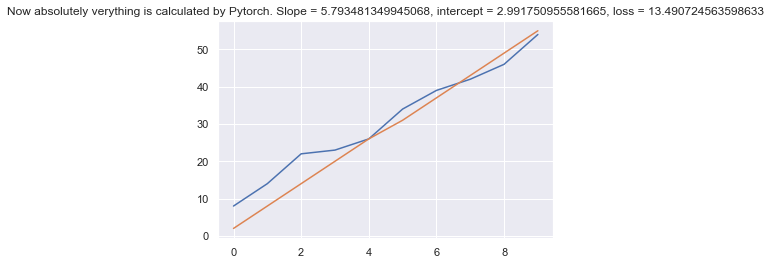

In [113]:
y_pred = model(x)
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y])
sns.lineplot(x = [int(item[0]) for item in x], y = [int(item[0]) for item in y_pred])
plt.title(f'Now absolutely verything is calculated by Pytorch. Slope = {weights[0].item()}, intercept = {weights[1].item()}, loss = {error}')